Consider a dataset  $\mathcal{D} = \{(\mathbf{x}_1,y_1), (\mathbf{x}_2,y_2), \ldots, (\mathbf{x}_N,y_N)\}$
of $N$ independent and identically distributed observations 
where each $\mathbf{x}_n$ is a $p$-dimensional real vector.
Assume the random variable $Y_n$ is distributed
Laplacian with a mean $\boldsymbol{\beta}^T\mathbf{x}_n$ and known scale parameter $b>0$.
In other words,
$Y_n | \mathbf{x}_n, \boldsymbol{\beta} \sim \mathcal{L}(\boldsymbol{\beta}^T\mathbf{x}_n,b)$.
Define the a priori distribution of the parameters $\boldsymbol{\beta} = (\beta_1, \beta_2, \ldots, \beta_p)$ 
{\em multivariate} Gaussian with parameters mean $\mathbf{0}$ and variance $\sigma^2 \mathbf{I}$.

$Pr(y_n|\mathbf{x}_n, \boldsymbol{\beta}) = \frac{1}{2b}\exp\left [-\frac{|y_n-\mathbf{x}_n^T\boldsymbol{\beta}|}{b}\right ]$

$P(\boldsymbol{\beta}) = \mathcal{N}(\mathbf{0},\sigma^2 \mathbf{I})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 5),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

import cvxpy as cp
dim = 3
numrepetitions = 100
betaTRUE = np.random.multivariate_normal(np.zeros(dim),np.eye(dim))

What happens to $\textrm{E}(\|\beta - \hat\beta\|_2)$ as $b$ increases and $N$ remains constant? Or, equivalently, as $b$ decreases and $N$ remains constant?

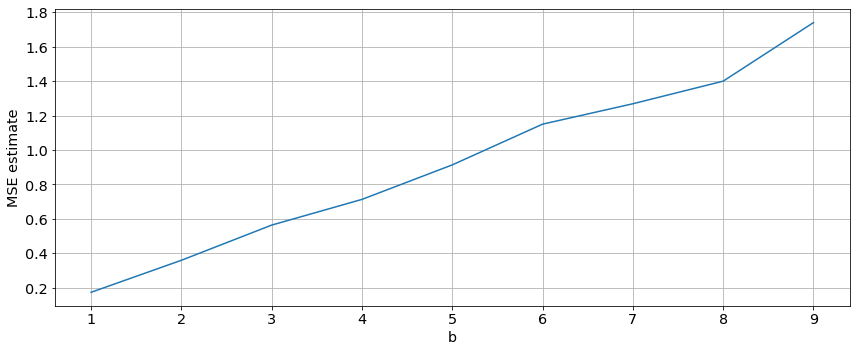

In [82]:
bTRUE = np.arange(1,10)
N = 100

error = []
for b in bTRUE:
    error2 = []
    for nn in range(numrepetitions):
        X_train = np.random.multivariate_normal(np.zeros(dim),np.eye(dim),N)
        Y_train = np.asarray([np.random.laplace(np.dot(xx,betaTRUE),b) for xx in X_train])
        problem = cp.Problem(cp.Minimize(cp.norm1(X_train @ betaHAT - Y_train)))
        problem.solve()
        error2.append(np.linalg.norm(betaHAT.value-betaTRUE))
    error.append(np.mean(error2))
    
fig, ax1 = plt.subplots()
plt.plot(bTRUE,error)
plt.grid()
plt.xlabel("b")
plt.ylabel("MSE estimate")
fig.tight_layout()

What happens to $\textrm{E}(\|\beta - \hat\beta\|_2)$ as $N$ increases and $b$ remains constant? Or equivalently, as $N$ decreases and $b$ remains constant?

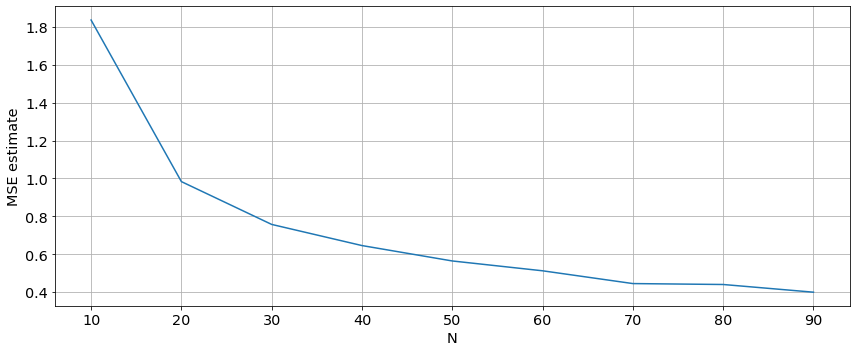

In [84]:
bTRUE = 2
Nvals = np.arange(10,100,10)

error = []
for N in Nvals:
    error2 = []
    for nn in range(numrepetitions):
        X_train = np.random.multivariate_normal(np.zeros(dim),np.eye(dim),N)
        Y_train = np.asarray([np.random.laplace(np.dot(xx,betaTRUE),bTRUE) for xx in X_train])
        problem = cp.Problem(cp.Minimize(cp.norm1(X_train @ betaHAT - Y_train)))
        problem.solve()
        error2.append(np.linalg.norm(betaHAT.value-betaTRUE))
    error.append(np.mean(error2))
    
fig, ax1 = plt.subplots()
plt.plot(Nvals,error)
plt.grid()
plt.xlabel("N")
plt.ylabel("MSE estimate")
fig.tight_layout()